# Nayak, Anil Kumar
# 1001-396-015
# 2017-02-20
# Assignment_02_01

In [1]:
from skimage import data
from IPython.html.widgets import interact, fixed
from ipywidgets import FloatSlider, IntSlider, Label
import matplotlib.pyplot as plt
import numpy as np
import cv2

#img = cv2.imread('image.PNG',0) 
img=data.checkerboard()

E:\Program File X\Anaconda\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [94]:
#Steps
#1. Canny Edge Detection
#2. Binary Image


def my_HoughLines(input_image,rho_resolution,theta_resolution,threshold):
    #1. Edge detection, e.g. using the Canny edge detector [2].
    edges = cv2.Canny(input_image,50,150,apertureSize = 3)
    
    #2. Mapping of edge points to the Hough space and storage in an accumulator.
    #2.1 Define Accumulator
    #rho_dimension = rho_resolution*2+1
    #theta_dimension = theta_resolution*2+1
    
    w, h = input_image.shape
    digonal = np.sqrt(w**2+h**2)
    digonal = np.ceil(digonal)
    max_size=max(w,h)**2
    #
    theta_bin = np.deg2rad(np.linspace(0,180,theta_resolution))
    rho_bin = np.linspace(-digonal,digonal,rho_resolution)
     
    accumulator = np.zeros((rho_resolution,theta_resolution))

    for x in range(w):
        for y in range(h):
            #Got the Point
            if edges[x][y] == 255:
                #calculate r and t
                for t in range(theta_resolution):
                    theta = theta_bin[t]
                    rho = x * np.cos(theta) + y * np.sin(theta)
                    r = 0;
                    for r1 in range(rho_resolution):
                        if rho_bin[r1]>=rho:
                            r = r1
                            break
                    
                    accumulator[r1,t] = accumulator[r1,t] + 1
    lines = []
    for r in range(rho_resolution):
        for t in range(theta_resolution):
            if accumulator[r,t] >= threshold:
                line = []
                line.append(rho_bin[r])
                line.append(theta_bin[t])
                lines.append(line) 
                
    #3. Interpretation of the accumulator to yield lines of infinite length. The interpretation is
    #done by thresholding and possibly other constraints.
    #4. Conversion of infinite lines to finite lines.
   
    return lines;

In [95]:
def HoughLines_OpenCV(input_image,rho_resolution,theta_resolution,threshold):
    
    edges = cv2.Canny(input_image,50,150,apertureSize = 3)
    # edges = np.where(edges>0,1,0)
    
    lines = cv2.HoughLines(edges,1,np.pi/180,120)
       
    w, h = input_image.shape
    output_image = np.empty((w, h, 3))
    output_image[:, :, 2] =  output_image[:, :, 1] =  output_image[:, :, 0] =  input_image/255.
    max_size=max(w,h)**2
    
    #print(lines)
    
    for rho_theta in lines:
        rho=rho_theta[0][0]
        theta=rho_theta[0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + max_size*(-b))
        y1 = int(y0 + max_size*(a))
        x2 = int(x0 - max_size*(-b))
        y2 = int(y0 - max_size*(a))
        cv2.line(output_image,(x1,y1),(x2,y2),(1,0,0),1)
        
    #cv2.imwrite('houghlines3.jpg',img)
    
      
    return edges,output_image

In [96]:
def hough_tranformation(input_image,rho_resolution=100,theta_resolution=360,threshold=20):
    canny_edge,opencv_hough_line = HoughLines_OpenCV(input_image,rho_resolution,theta_resolution,threshold)
    my_hough_lines = my_HoughLines(input_image,rho_resolution,theta_resolution,threshold)
    
    #print(lines)
    w, h = input_image.shape
    max_size=max(w,h)**2
    hough_line_image = np.empty((w, h, 3))
    hough_line_image[:, :, 2] =  hough_line_image[:, :, 1] =  hough_line_image[:, :, 0] =  input_image/255.
    for rho_theta in my_hough_lines:
        rho=rho_theta[0]
        theta=rho_theta[1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + max_size*(-b))
        y1 = int(y0 + max_size*(a))
        x2 = int(x0 - max_size*(-b))
        y2 = int(y0 - max_size*(a))
        cv2.line(hough_line_image,(x1,y1),(x2,y2),(1,0,0),1)
    
    fig, axes_array = plt.subplots(1, 4)
    fig.set_size_inches(9,3)
    image_plot = axes_array[0].imshow(input_image,cmap=plt.cm.gray) 
    axes_array[0].axis('off')
    axes_array[0].set(title='Original image')
    image_plot = axes_array[1].imshow(canny_edge,cmap=plt.cm.gray)
    axes_array[1].axis('off')
    axes_array[1].set(title='Canny Edges OpenCV')
    image_plot = axes_array[2].imshow(opencv_hough_line)
    axes_array[2].axis('off')
    axes_array[2].set(title='Hough Lines OpenCV')
    image_plot = axes_array[3].imshow(hough_line_image)
    axes_array[3].axis('off')
    axes_array[3].set(title='Hough Lines Mine')
    
    plt.show()
    return 0

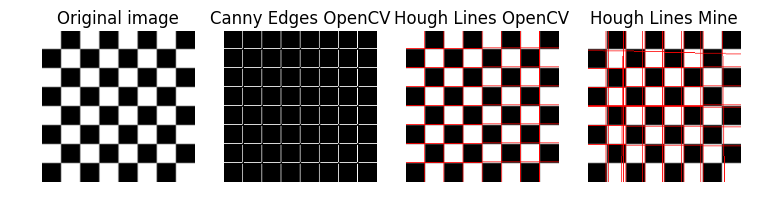

0

<function __main__.hough_tranformation>

In [99]:
interact(hough_tranformation,
         input_image=fixed(img),
         rho_resolution=IntSlider(min=10, max=1000, step=1,value=202,continuous_update=False),
         theta_resolution=IntSlider(min=10, max=1000, step=1,value=360,continuous_update=False),
         threshold=IntSlider(min=5, max=1000, step=1,value=193,continuous_update=False)) 

# Hough Transformation Circle Detection

In [ ]:
def my_HoughCircles(input_image, resolution, threshold, min_radius, max_radius):
    canny_edge_circle = cv2.Canny(input_image,50,150,apertureSize = 3)
    #canny_edge_circle = cv2.Canny(input_image, 32, 2)
   
    w,h = canny_edge_circle.shape
    
    radius_bin = np.linspace(min_radius,max_radius,resolution)
    a_bin = np.linspace(w-resolution,w+resolution,resolution)
    b_bin = np.linspace(h-resolution,h+resolution,resolution)
    theta_bin = np.linspace(0,360,16)
    
    accumulator = np.zeros((resolution,resolution,resolution))
 
    #print(radius_bin)
    #print(a_bin)
    #print(b_bin)
    #print(theta_bin)
    #for i in range(0,len(x_idxs)):
       # x = x_idxs[i]
        #y = y_idxs[i]
    for x in range(w):
        for y in range(h):
            #Got the Point
            if canny_edge_circle[x][y] == 255:
                #print(1)
                for r in radius_bin:
                    for t in theta_bin:
                        a = x - (r * np.cos(t * np.pi / 180));
                        b = y - (r * np.sin(t * np.pi / 180));

                        for n in range(0,len(a_bin)):
                            if a_bin[n]>a:
                                break
                        for m in range(0,len(b_bin)):
                            if b_bin[m]>b:
                                break
                        for o in range(0,len(radius_bin)):
                            if radius_bin[o]>r:
                                break
                       
                        #print(a,b,r)
                        #print(n,m,o)
                        accumulator[o,n,m] = accumulator[o,n,m] + 1;
    
    r_idxs, a_idxs, b_idxs = np.where(accumulator>threshold)
    circles = []
   
   
    
    for i in range(0,len(r_idxs)):
        circle = []
        circle.append((int)(np.ceil(a_bin[a_idxs[i]])))
        circle.append((int)(np.ceil(b_bin[b_idxs[i]])))
        circle.append((int)(np.ceil(radius_bin[r_idxs[i]])))
        circles.append(circle)
        
    return circles

In [ ]:
def hough_transform_circle_opencv(input_image,min_radius,max_radius,threshold):
    canny_edge = cv2.Canny(input_image, 32, 2)
    #input_image = cv2.imread('circle.png',cv2.IMREAD_GRAYSCALE)
    circles = cv2.HoughCircles(input_image,3,2, 100, 30, threshold,min_radius,max_radius)
    
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(input_image,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
        cv2.circle(input_image,(i[0],i[1]),2,(0,0,255),3)

    return canny_edge,input_image

In [ ]:
def hough_tranformation_circle(resolution=100,threshold=20,min_radius=5,max_radius=5):
    input_image = cv2.imread('circle.png',cv2.IMREAD_GRAYSCALE)
    hough_circle_mine_image = cv2.imread('circle.png',cv2.IMREAD_GRAYSCALE)
    input_image1 = cv2.imread('circle.png',cv2.IMREAD_GRAYSCALE)
    canny_edge,hough_circle_opencv = hough_transform_circle_opencv(input_image1,min_radius,max_radius,threshold)
    hough_circle_mine = my_HoughCircles(hough_circle_mine_image, resolution, threshold, min_radius, max_radius)
    
    for i in hough_circle_mine:
        # draw the outer circle
        cv2.circle(hough_circle_mine_image,(i[0],i[1]),i[2],(0,255,0),2)
        # draw the center of the circle
        cv2.circle(hough_circle_mine_image,(i[0],i[1]),2,(0,0,255),3)
    
    
    fig2, axes_array = plt.subplots(1, 3)
    fig2.set_size_inches(9,3)
    image_plot = axes_array[0].imshow(input_image,cmap=plt.cm.gray) 
    axes_array[0].axis('off')
    axes_array[0].set(title='Original image')
    image_plot = axes_array[1].imshow(hough_circle_opencv)
    axes_array[1].axis('off')
    axes_array[1].set(title='Hough Circle OpenCV')
    image_plot = axes_array[2].imshow(hough_circle_mine_image)
    axes_array[2].axis('off')
    axes_array[2].set(title='Hough Circle Mine')
    
    plt.show()
    return 0


interact(hough_tranformation_circle,
         resolution=IntSlider(min=100, max=1000, step=1,value=100, continuous_update=False),
         threshold=IntSlider(min=20, max=1000, step=1,value=50, continuous_update=False),
         min_radius=IntSlider(min=5, max=1000, step=1,value=20,continuous_update=False),
         max_radius=IntSlider(min=5, max=1000, step=1,value=50,continuous_update=False)) 